In [175]:
# Libraries needed (pandas is not standard and must be installed in Python)
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy as np
import geopandas as gpd
import reading_data as rd
# Insert your own client ID here
with open("../ignore_me/client_id.txt") as f: client_id = f.read().strip()



In [ ]:
#Midlertidig løsning for å oppdatere reading_data
import importlib
importlib.reload(rd)


<module 'reading_data' from '/Users/tha222/git-folder/troms_weather/scripts/reading_data.py'>

In [ ]:
client_id = '../ignore_me/client_id.txt'
client_secret = '../ignore_me/client_secret.txt'


/Users/tha222/miniforge3/envs/hel-8048/lib/python3.13/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'Basisdata_55_Troms_25833_N1000Hoyde_GML.gml': 'Høydekurve' (default), 'Høydelag', 'Terrengpunkt'. Specify layer parameter to avoid this warning.
  result = read_func(


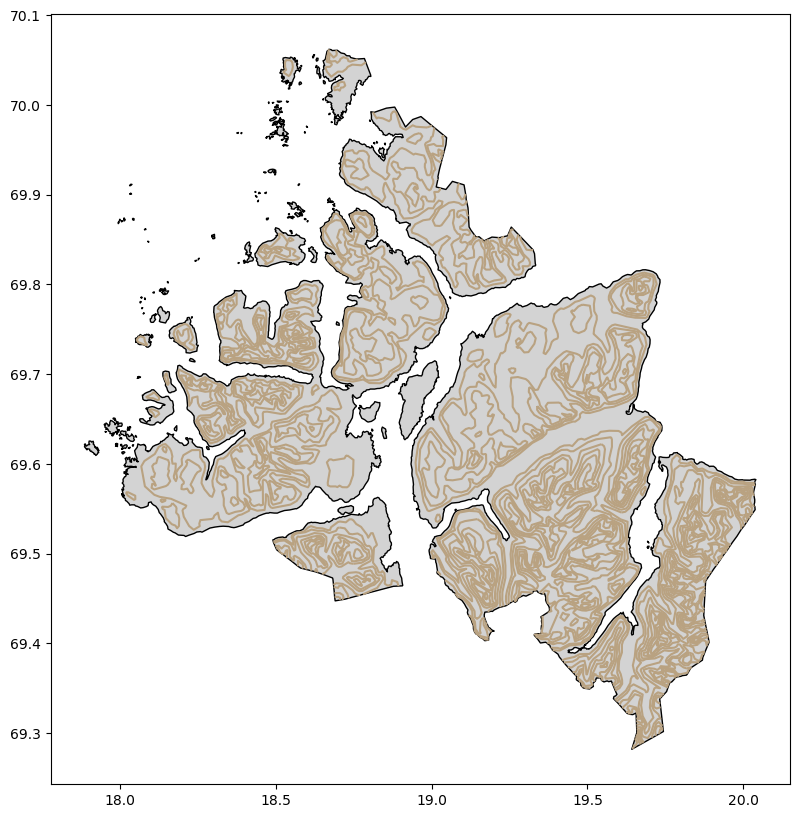

In [167]:
gdf = gpd.read_file('../test_files/Kommuner-L.geojson')
hoyde = gpd.read_file('../test_files/Basisdata_55_Troms_25833_N1000Kartdata_GML/Basisdata_55_Troms_25833_N1000Hoyde_GML.gml')
hoyde = hoyde.to_crs(gdf.crs)
tromso = gdf[gdf['name'] == 'Tromsø']
clipped_hoyde = gpd.clip(hoyde, tromso)
fig, ax = plt.subplots(figsize=(10, 10))
tromso.plot(ax=ax, color="lightgrey", edgecolor="black")
clipped_hoyde.plot(ax=ax, color="xkcd:taupe", markersize=0.2)
#station_coordinates.plot(ax=ax, column='year', cmap='GnBu', markersize=30, legend=True)
plt.show()



In [ ]:
test = rd.FindingStations(client_id, client_secret)
a = test.get_sensors(69.65, 18.95, 30, "TROMSØ")


In [ ]:
a


[['SN90450', 'TROMSØ'],
 ['SN90451', 'TROMSØ PLU'],
 ['SN90400', 'TROMSØ - HOLT'],
 ['SN90510', 'TROMSDALEN'],
 ['SN90480', 'E8 BREIVIKA'],
 ['SN90490', 'TROMSØ - LANGNES'],
 ['SN90495', 'STAKKEVOLLAN'],
 ['SN90560', 'KVALØYSLETTA'],
 ['SN90491', 'TROMSØ LH - STORKJØLEN'],
 ['SN90360', 'E8 SANDVIKEIDET'],
 ['SN90612', 'RINGVASSØYA - DAMVATNET'],
 ['SN91020', 'BREIVIKEIDET'],
 ['SN91010', 'FV91 BREIVIKEIDET'],
 ['SN90295', 'SESSØYA'],
 ['SN91060', 'SJURSNES'],
 ['SN90980', 'OLDERVIK'],
 ['SN90290', 'NORDRE ANGSTAURSUNDET'],
 ['SN91080', 'YTRE HOLMEBUKT'],
 ['SN90720', 'MÅSVIK'],
 ['SN90721', 'REBBENESØY - GRÅHAUGEN']]

In [209]:
rd.ReadingData('SN90450', client_id, client_secret).get_temperature_daily('2025-01-01', '2025-03-4')


,date,temperature
0,2025-01-01,-4.8
1,2025-01-02,-6.7
2,2025-01-03,-3.3
3,2025-01-04,-6.0
4,2025-01-05,-8.4
...,...,...
57,2025-02-27,1.8
58,2025-02-28,1.4
59,2025-03-01,1.2
60,2025-03-02,1.6
